In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [3]:
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [5]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [6]:
y = a*x + b

NameError: name 'a' is not defined

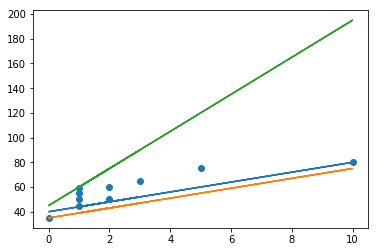

In [7]:
a = 4
b = 40
plt.scatter(X[1,:], y)
plt.plot(X[1,:], a*X[1,:] + b)
plt.plot(X[1,:], 4*X[1,:] + 35)
plt.plot(X[1,:], 15*X[1,:] + 45)

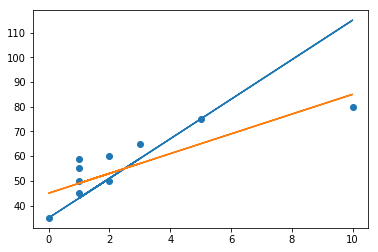

In [8]:
a = 8
b = 35
plt.scatter(X[1,:], y)
# y = a*x + b
plt.plot(X[1, :], a*X[1, :] + b)
plt.plot(X[1, :], 4*X[1, :] + 45)

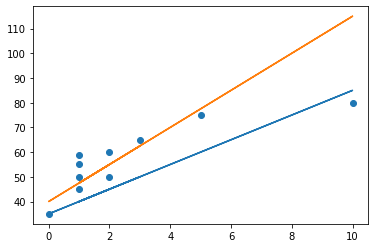

In [0]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*X[0] + X[1]*5)
plt.plot(X[1], 40*X[0] + X[1]*7.5)

# mse - mean squared error
# mae - mean absolute error

In [9]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [0]:
y_pred1

array([40., 40., 45., 40., 50., 35., 60., 85., 40., 45.])

In [0]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

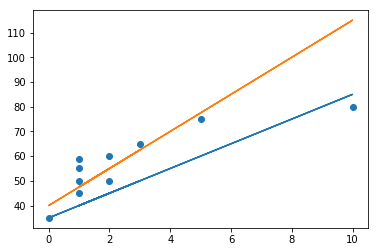

In [10]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1)
plt.plot(X[1], y_pred2)

In [11]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)

In [12]:
err1, err2

(9.4, -2.1)

In [13]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))

In [0]:
mae_1, mae_2

(10.4, 7.9)

In [0]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

In [0]:
mse_1, mse_2

(143.6, 151.35)

Метод наименьших квадратов

In [0]:
X.shape

(2, 10)

In [0]:
X.T.shape

(10, 2)

In [14]:
W = np.linalg.inv(X @ X.T) @ X @ y
W

array([47.23214286,  3.91071429])

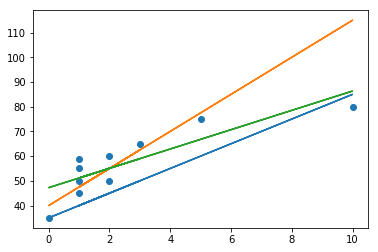

In [15]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)
plt.plot(X[1], W[0] + W[1] * X[1])

In [16]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [17]:
calc_mse(y, y_pred1)

143.6

In [18]:
def calc_mae(y, y_pred):
  err = np.mean(np.abs(y - y_pred))
  return err

In [19]:
calc_mae(y, y_pred1)

10.4

In [20]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [21]:
calc_mse(y, y_pred3)

45.937499999999986

In [22]:
calc_mae(y, y_pred3)

6.182142857142856

Градиентный спуск

In [23]:
np.mean(y_pred - y)**2
np.mean(w*x - y)**2
np.sum(w*x - y)**2 / n
1/n * np.sum((w*x - y)**2)
(w*x - y)**2

2*z*z`

2*x*(w*x - y) 
2*x*(w*x - y)

SyntaxError: invalid syntax (<ipython-input-23-aa22a6d60263>, line 7)

In [0]:
n = 10
f = 1/n * np.sum((W[0] * X[0] - y)**2)

In [0]:
alpha = 1e-8
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [0]:
W[0] - g


7.384623655590011

1. Подберите скорость обучения (alpha) и количество итераций:

In [87]:
n = X.shape[1]
alpha = 0.007
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.007)

In [84]:
for i in range(1000):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
  if i % 100 == 0:
    print(i, W, err)

0 [46.45020085  4.05510586] 46.27105514789982
100 [46.8555093   3.98026255] 46.014884960714724
200 [47.05073192  3.9442132 ] 45.955453349491144
300 [47.14476369  3.92684952] 45.94166518603842
400 [47.19005543  3.91848605] 45.938466325238814
500 [47.21187085  3.91445767] 45.93772418793749
600 [47.22237855  3.91251734] 45.93755201171335
700 [47.22743974  3.91158275] 45.93751206674343
800 [47.22987753  3.9111326 ] 45.93750279949048
900 [47.23105173  3.91091577] 45.93750064948319


In [ ]:
# alpha = 0.007
# iterations = 1000
# with alpha = 0.05 about 200 iterations is enough

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [78]:
print(X.shape)
print(W.shape)
for i in range(1000):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  W -= (alpha * (1/n * 2 * np.dot(X, (y_pred - y))))
  if i % 100 == 0:
    print(i, W, err)

(2, 10)
(2,)
[-0.12427662  0.02294863]
0 [47.20841244  3.91509629] 45.937807205672314
[-0.05985961  0.01105354]
100 [47.22071276  3.91282494] 45.93757127186921
[-0.02883224  0.00532409]
200 [47.22663739  3.91173091] 45.937516535109204
[-0.01388746  0.00256443]
300 [47.22949107  3.91120396] 45.93750383615357
[-0.00668909  0.00123519]
400 [47.23086559  3.91095014] 45.93750088998955
[-0.0032219   0.00059495]
500 [47.23152764  3.91082789] 45.93750020647803
[-0.00155187  0.00028657]
600 [47.23184653  3.910769  ] 45.937500047903
[-0.00074748  0.00013803]
700 [47.23200013  3.91074064] 45.937500011113514
[-3.60035335e-04  6.64832786e-05]
800 [47.23207411  3.91072698] 45.93750000257835
[-1.73416168e-04  3.20226222e-05]
900 [47.23210974  3.9107204 ] 45.9375000005982


Задание *3: вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию
начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [88]:
err_prev = 0
err = sum(el * el for el in y)
max_err_delta = 0.0005
max_iter = 10000
i = 0
while abs(err - err_prev) > max_err_delta and max_iter > i:
  err_prev = err
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  W -= (alpha * (1/n * 2 * np.dot(X, (y_pred - y))))
  if i % 100 == 0:
    print(i, W, err)
  i += 1

print("done in {} iterations".format(i))
print(W, err, abs(err - err_prev))

0 [1.7714 2.88  ] 3173.15
100 [26.1460053   7.80443089] 288.49383624031765
200 [37.07570315  5.78617857] 102.21069101278303
300 [42.34014842  4.81405848] 58.992908388192646
400 [44.87584378  4.34582294] 48.96636125906345
500 [46.09719771  4.12029059] 46.640197323122585
600 [46.6854803   4.01165971] 46.10052612952179
700 [46.96883502  3.95933609] 45.97532214337856
done in 709 iterations
[46.98378189  3.95657604] 45.97115001406987 0.000495240972782085
